## Simulating 20 neurons

In [6]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from torch_geometric.utils import to_networkx

sys.path.append("..")
from spiking_network.models import SpikingModel
from spiking_network.datasets import W0Dataset, GlorotParams

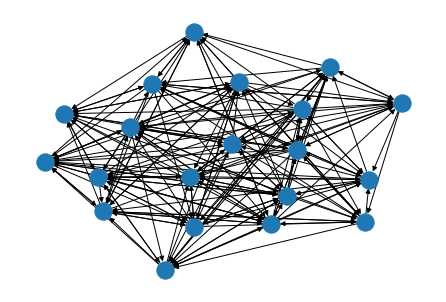

In [2]:
n_neurons = 20
n_datasets = 1
n_steps = 10000

# Create a dataset
dataset = W0Dataset(n_neurons, n_datasets, GlorotParams(0, 5), seeds=[0])

# Visualize a w0 matrix as a graph
w0 = dataset[0]
G = to_networkx(w0, remove_self_loops=True)
nx.draw(G)


In [3]:
# Create a model
model = SpikingModel()

# Simulate the model
X = model.simulate(w0, n_steps)

100%|██████████| 10000/10000 [00:01<00:00, 6501.99it/s]


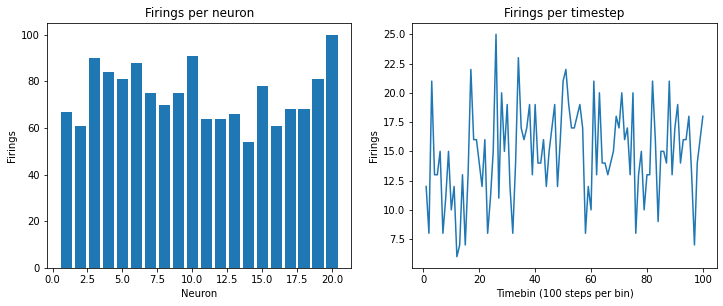

In [5]:
# Visualize the spikes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
fig.set_figheight(4.5)
fig.set_figwidth(12)

axes[0].set_title("Firings per neuron")
axes[0].set_ylabel("Firings")
axes[0].set_xlabel("Neuron")
axes[0].bar(range(1, n_neurons + 1), torch.sum(X, axis=1), lw=0)

axes[1].set_title("Firings per timestep")
axes[1].set_ylabel("Firings")
axes[1].set_xlabel(f"Timebin ({n_steps // 100} steps per bin)")
axes[1].plot(range(1, 101), torch.sum(X, axis=0).reshape(100, -1).sum(axis=0))